#Objetivo

Diseñar, entrenar y evaluar un modelo de red neuronal profunda para predecir la probabilidad de impago de clientes bancarios, utilizando un conjunto de datos realista.

#Carga del dataset "German Credit Data" desde Kaggle

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings

# Filtrar todos los warnings
warnings.filterwarnings("ignore")

# Dataset que se desea cargar
file_path = "german_credit_data.csv"

# ===========================================
# CARGAR Y EXPLORAR EL DATASET
# ===========================================
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "varunchawla30/german-credit-data",
  file_path
)

columns =['status','duration','credit_history','purpose','amount','savings',
          'employment_duration','installment_rate','personal_status_sex','other_debtors',
          'present_residence','property','age','other_installment_plans','housing',
          'number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data.columns = columns

display(data)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#Descripción de variables

``status``: **Estado de la cuenta de cheques existente** (categórica).
Indica el estado actual de la cuenta de cheques del solicitante.
* 1 : sin cuenta de cheques
* 2 : ... < 0 DM
* 3 : 0 <= ... < 200 DM
* 4 : ... >= 200 DM / asignaciones salariales por al menos 1 año

``duration``: **Duración en meses** (numérica).
Representa la duración del crédito en meses. Es una variable numérica discreta que indica el plazo del préstamo.

``credit_history``: **Historial crediticio** (categórica).
Describe el historial de pagos de créditos anteriores del solicitante.
* 0 : retraso en el pago en el pasado
* 1 : cuenta crítica / otros créditos existentes (no en este banco)
* 2 : no se tomaron créditos / todos los créditos pagados a tiempo
* 3 : créditos existentes pagados a tiempo hasta ahora
* 4 : todos los créditos en este banco pagados a tiempo

``purpose``: **Propósito** (categórica).
Indica el motivo por el cual se solicita el crédito.
* 0 : otros
* 1 : coche (nuevo)
* 2 : coche (usado)
* 3 : muebles/equipamiento
* 4 : radio/televisión
* 5 : electrodomésticos
* 6 : reparaciones
* 7 : educación
* 8 : vacaciones
* 9 : reentrenamiento
* 10 : negocios

``amount``: **Monto del crédito** (numérica).
Representa la cantidad de dinero solicitada como crédito. Es una variable continua que indica el tamaño del préstamo.

``savings``: **Cuenta de ahorros/bonos** (categórica).
Indica el estado de la cuenta de ahorros o bonos del solicitante.
* 1 : desconocido / sin cuenta de ahorros
* 2 : ... < 100 DM
* 3 : 100 <= ... < 500 DM
* 4 : 500 <= ... < 1000 DM
* 5 : ... >= 1000 DM

``employment_duration``: **Duración del empleo actual** (categórica).
Describe la duración del empleo actual del solicitante.
* 1 : desempleado
* 2 : ... < 1 año
* 3 : 1 <= ... < 4 años
* 4 : 4 <= ... < 7 años
* 5 : ... >= 7 años

``installment_rate``: **Tasa de cuotas en porcentaje del ingreso disponible** (categórica).
Representa el porcentaje del ingreso disponible del solicitante que se destinará al pago de las cuotas del crédito. Es una variable que indica la carga financiera del préstamo.
* 1 : ... >= 35
* 2 : 25 <= ... < 35
* 3 : 20 <= ... < 25
* 4 : ... < 20

``personal_status_sex``: **Estado personal y sexo** (categórica).
Combina el estado civil y el sexo del solicitante.
* 1 : hombre : divorciado/separado
* 2 : mujer : no soltera u hombre soltero
* 3 : hombre : casado/viudo
* 4 : mujer : soltera

``other_debtors``: **Otros deudores / garantes** (categórica).
Indica si el solicitante tiene otros deudores o garantes.
* 1 : ninguno
* 2 : co-solicitante
* 3 : garante

``present_residence``: **Residencia actual desde** (categórica).
Representa el tiempo que el solicitante ha residido en su domicilio actual. Es una variable que indica la estabilidad de la residencia.
* 1 : ... < 1 año
* 2 : 1 <= ... < 4 años
* 3 : 4 <= ... < 7 años
* 4 : ... >= 7 años

``property``: **Propiedad** (categórica).
Indica el tipo de propiedad que posee el solicitante.
* 1 : desconocido / sin propiedad
* 2 : coche u otro
* 3 : acuerdo de ahorro de sociedad de construcción / seguro de vida
* 4 : bienes raíces

``age``: **Edad en años** (numérica).
Representa la edad del solicitante en años. Es una variable numérica que puede influir en la capacidad de pago.

``other_installment_plans``: **Otros planes de cuotas** (categórica).
Indica si el solicitante tiene otros planes de pago a plazos.
* 1 : banco
* 2 : tiendas
* 3 : ninguno

``housing``: **Vivienda** (categórica).
Describe el tipo de vivienda del solicitante.
* 1 : gratis
* 2 : alquiler
* 3 : propia

``number_credits``: **Número de créditos existentes en este banco** (categórica).
Representa la cantidad de créditos que el solicitante tiene actualmente con este banco.
* 1 : 1
* 2 : 2-3
* 3 : 4-5
* 4 : ... >= 6

``job``: **Empleo** (categórica).
Describe la categoría de empleo del solicitante.
* 1 : desempleado / no calificado - no residente
* 2 : no calificado - residente
* 3 : empleado calificado / funcionario
* 4 : gerencia / autónomo / empleado altamente calificado

``people_liable``: **Personas a cargo** (categórica).
Indica el número de personas que dependen económicamente del solicitante.
* 1 : 3 o más
* 2 : 0 a 2

``telephone``: **Teléfono** (categórica).
Indica si el solicitante tiene un teléfono registrado.
* 1 : ninguno
* 2 : sí, registrado a nombre del cliente

``foreign_worker``: **Trabajador extranjero** (categórica).
Indica si el solicitante es un trabajador extranjero.
* 1 : sí
* 2 : no

``credit_risk``: **Riesgo crediticio** (categórica).
Es la variable objetivo.
* 0 : malo
* 1 : bueno

## Visualización y análisis de distribución de variables

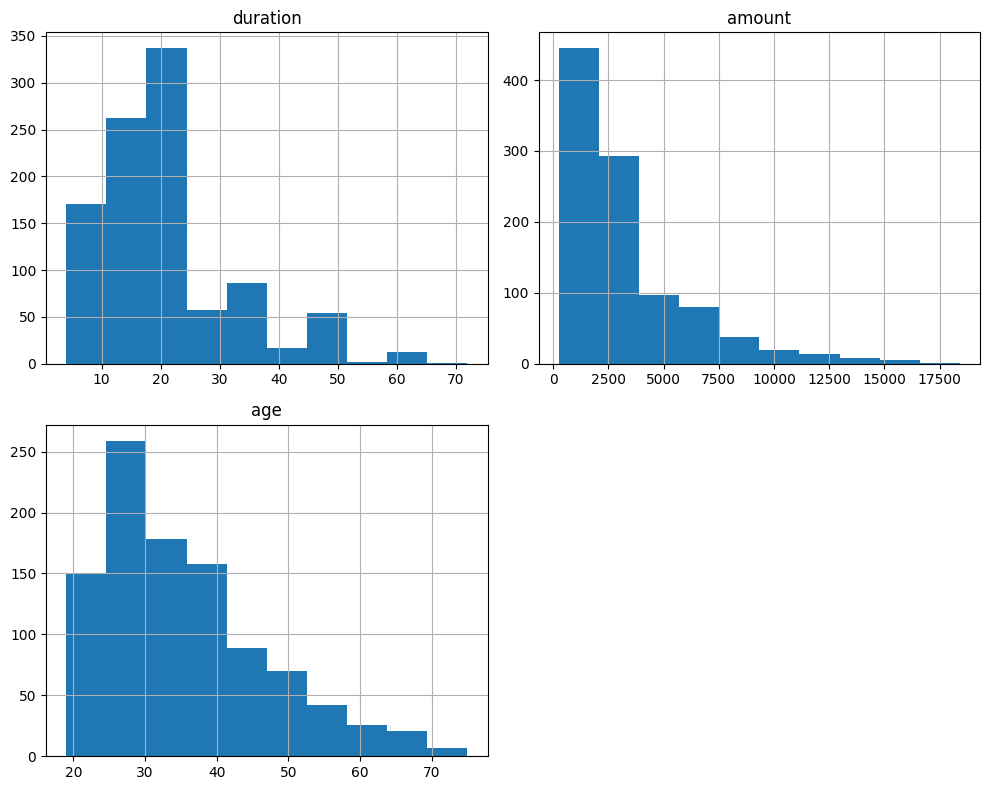

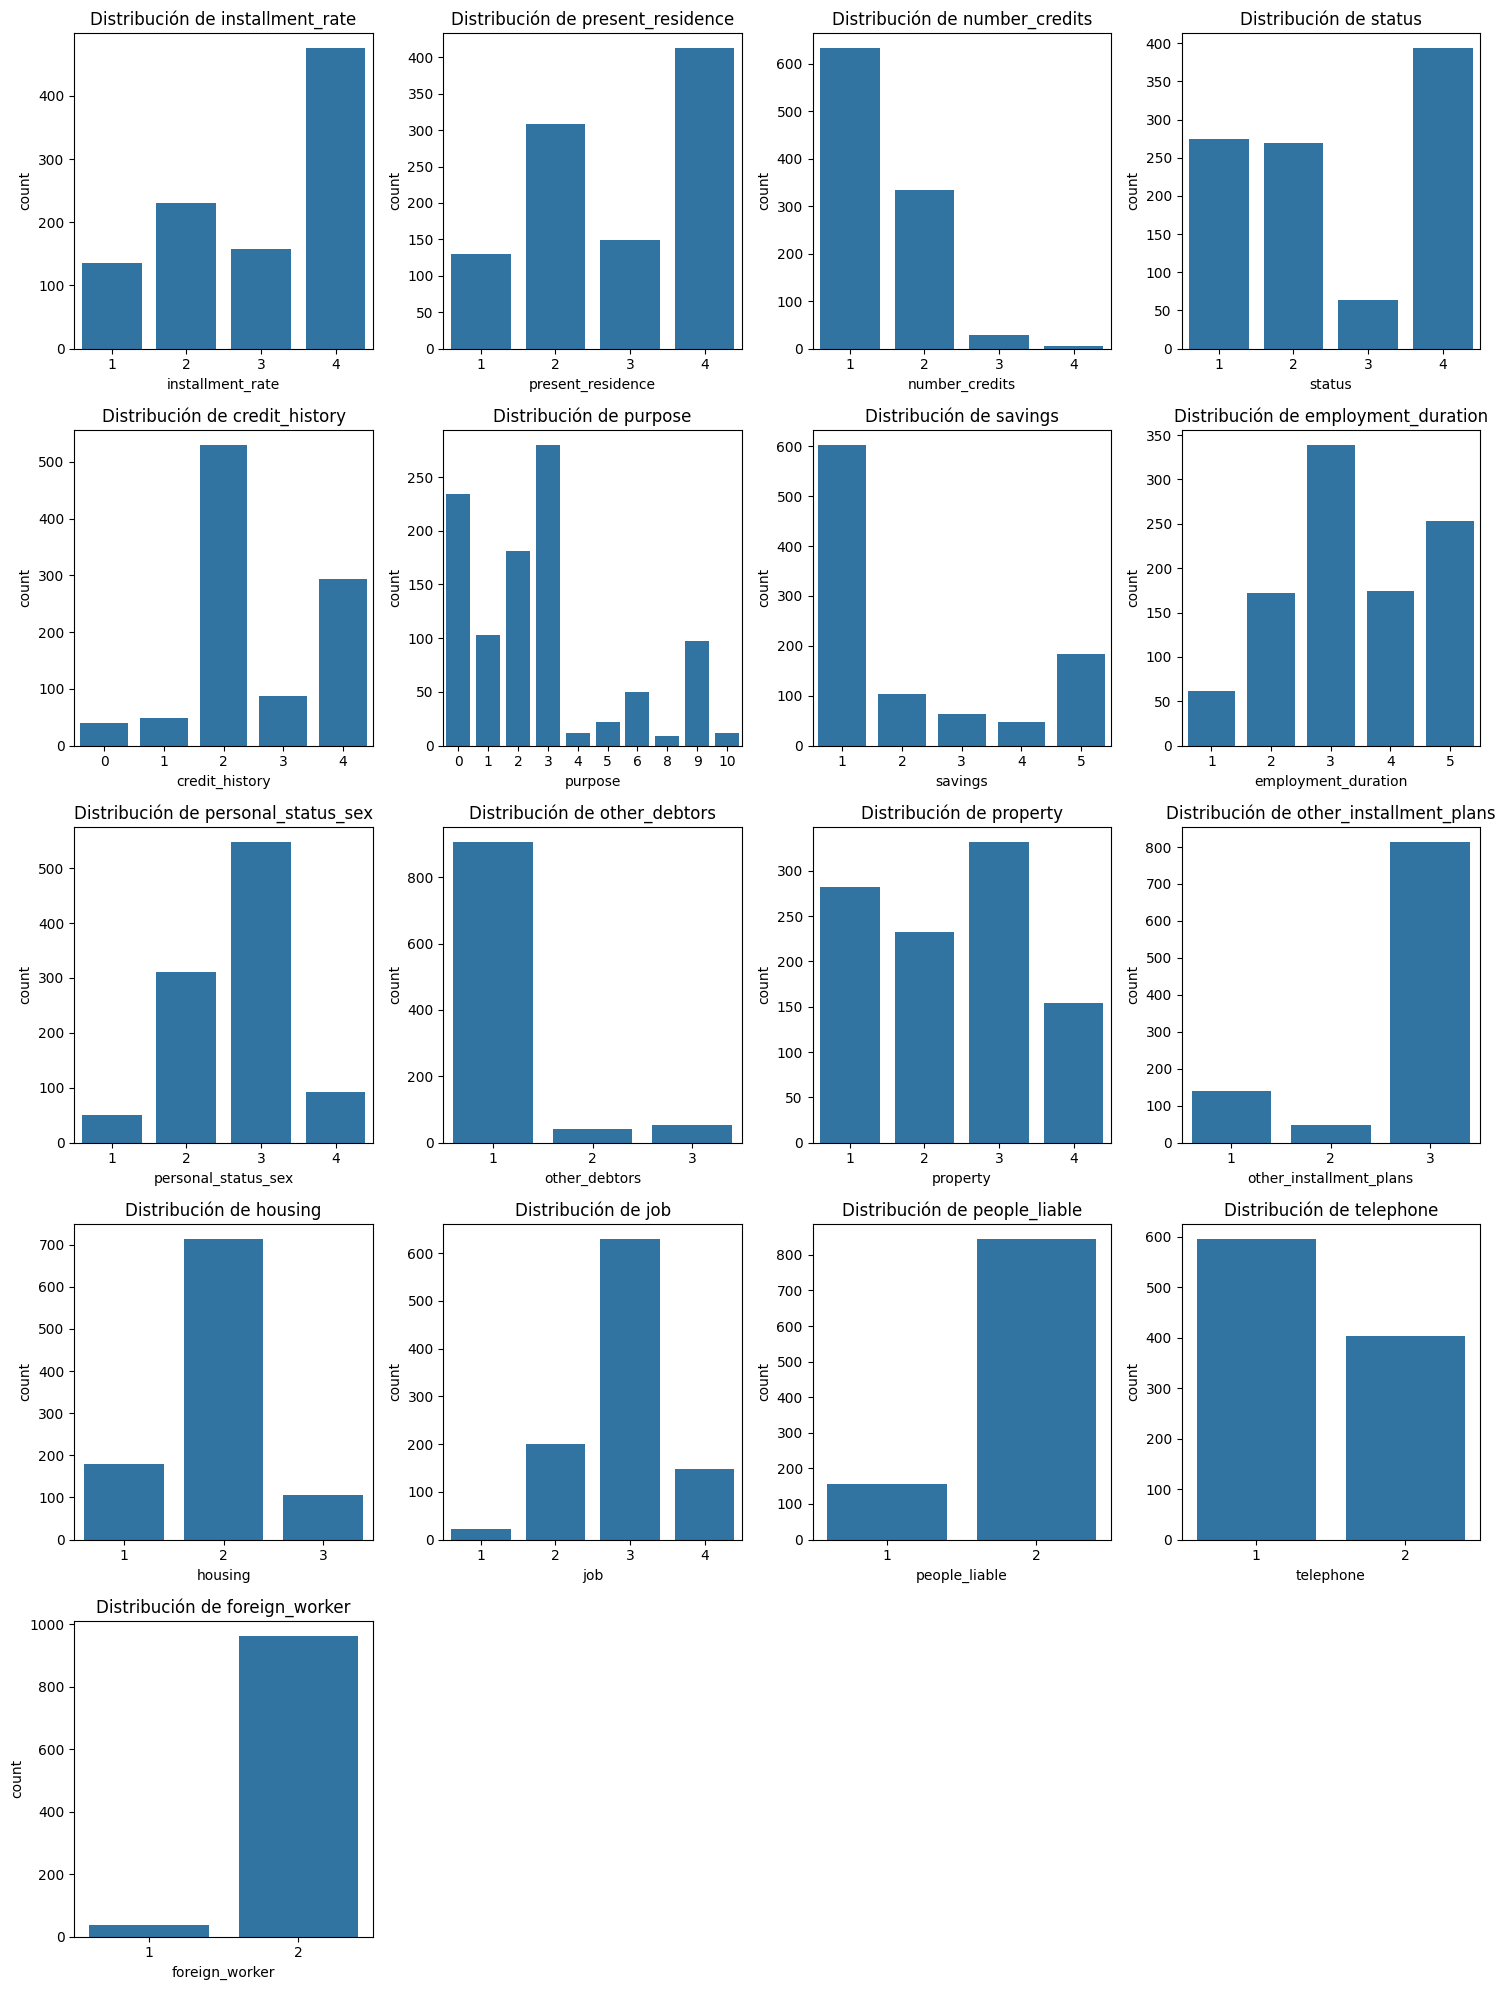

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de variables numéricas
numerical_cols = ['duration', 'amount', 'age']
data[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualización de la distribución de variables categóricas
categorical_cols = ['installment_rate', 'present_residence', 'number_credits', 'status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'people_liable', 'telephone', 'foreign_worker']
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 4, i + 1)
    sns.countplot(x=col, data=data)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

**Observaciones de las distribuciones de variables**

El análisis de la distribución de las variables puede indicar posibles sesgos en los modelos:
* La base de datos corresponde principalmente a créditos otorgados mayoritariamente a menos de 3 años (*number_credits*).
* La mayoría de los creditos corresponden a montos menores de 5000 Marcos Alemanes (*amount*).
* El dataset contiene datos mayoritariamente de gente menor o igual a 40 años (*age*).
* El dataset tiene pocos datos de trabajadores extranjeros (*foreign_worker*)
* El dataset tiene desbalanceado los datos de estado civil: Hay mucho menos hobmbres divorciados/separados y mujeres solteras (*personal_status_sex*)

## Correlación de variables

Correlación con 'credit_risk':
credit_risk                1.000000
status                     0.350847
credit_history             0.228785
savings                    0.178943
employment_duration        0.116002
other_installment_plans    0.109844
age                        0.091272
personal_status_sex        0.088184
number_credits             0.045732
telephone                  0.036466
other_debtors              0.025137
housing                    0.018119
present_residence         -0.002967
people_liable             -0.003015
purpose                   -0.017979
job                       -0.032735
installment_rate          -0.072404
foreign_worker            -0.082079
property                  -0.142612
amount                    -0.154740
duration                  -0.214927
Name: credit_risk, dtype: float64


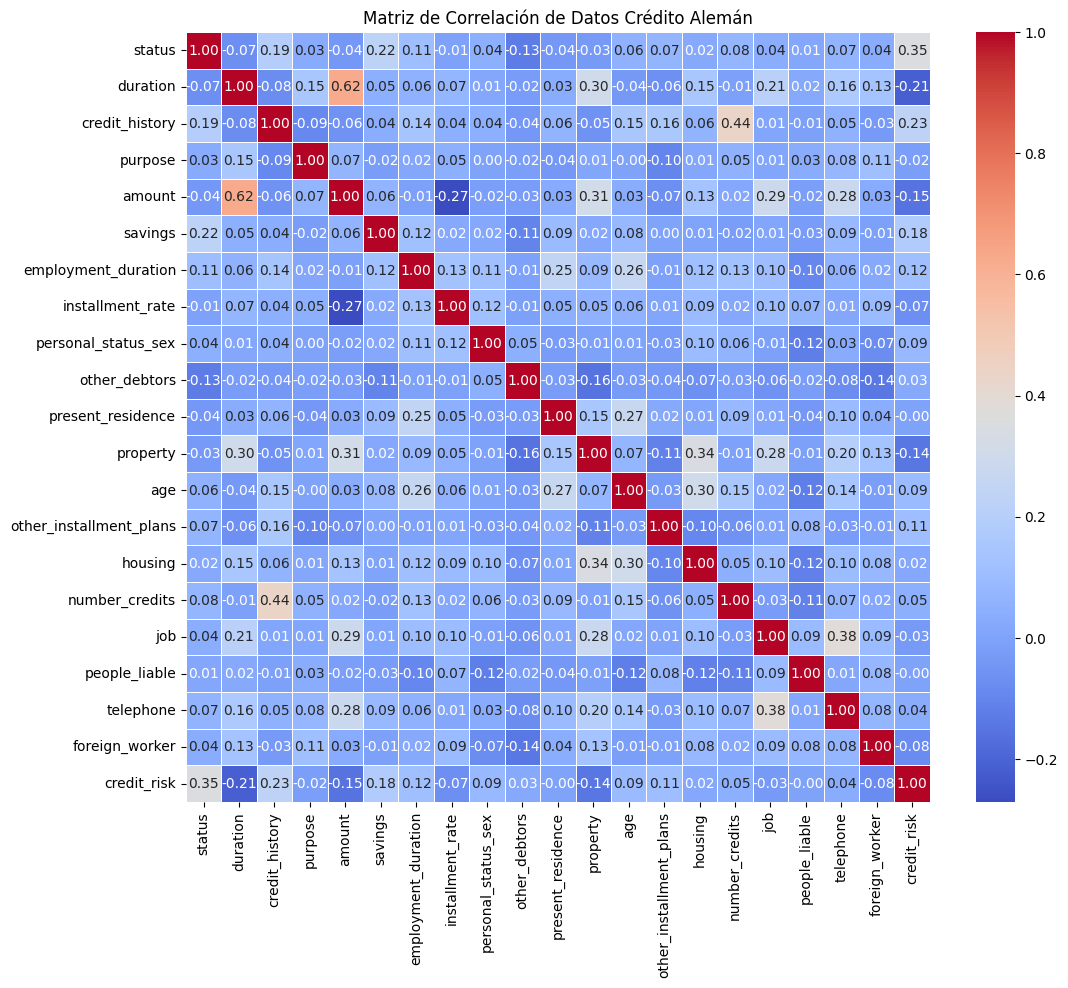

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = data.corr()

# Obtiene las correlaciones con la variable objetivo 'credit_risk'
correlation_with_target = correlation_matrix['credit_risk'].sort_values(ascending=False)

print("Correlación con 'credit_risk':")
print(correlation_with_target)

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Datos Crédito Alemán')
plt.show()

#Preprocesamiento

## Detección de valores anómalos

In [ ]:
print("Datos nulos:\n", data.isnull().sum())
print("\nValores que no son números:\n", data.isna().sum())
# Detección de registros duplicados
print("\nDatos duplicados: ", data.duplicated().sum())
print("")
data.info()

Datos nulos:
 status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Valores que no son números:
 status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property       

## Codificación y normalización de variables

In [ ]:
# Importa librerías necesarias
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import scipy.sparse # Importa scipy.sparse para verificar matriz dispersa

# Separación de conjunto de características y función objetivo (etiquetas)
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']
print("\nCaracterísticas (X):")
display(X.head())
print("\nEtiquetas (y):")
display(y)

# ===========================================
# Escala y codifica variables de interés
# ===========================================

# Identificar columnas numéricas y categóricas
numerical_cols = ['duration', 'amount', 'age']
categorical_cols = ['installment_rate', 'present_residence', 'number_credits', 'status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'people_liable', 'telephone', 'foreign_worker']

# Crear transformadores para columnas numéricas y categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Aplicar el preprocesamiento a los datos
X_processed = preprocessor.fit_transform(X)

# Convierte a array
if isinstance(X_processed, scipy.sparse.csr.csr_matrix):
    X_processed = X_processed.toarray()

# Obtiene los nombres de columnas
feature_names = preprocessor.get_feature_names_out(X.columns)

# Para convertir a dataFrame de pandas, se convierte a array
if not isinstance(X_processed, np.ndarray):
     X_processed = np.asarray(X_processed)

X = pd.DataFrame(X_processed, columns=feature_names)



Características (X):


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1



Etiquetas (y):


,credit_risk
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,0
997,0
998,0


## Conteo de clases de la variable objetivo

In [ ]:
# Contar las ocurrencias de cada valor en y
unique_values, counts = np.unique(y, return_counts=True)

print(unique_values)
print(counts)
for index, cont in enumerate(counts):
    print(f"Clase {index}: {(100*cont/counts.sum()):.2f}%")

[0 1]
[300 700]
Clase 0: 30.00%
Clase 1: 70.00%


## Modelo de Red Neuronal Profunda (DNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Red Neuronal Profunda
model = Sequential([
    Dense(62, activation='relu', input_shape=(X.shape[1],)),
    Dense(124, activation='relu'),
    Dense(248, activation='relu'),
    Dense(124, activation='relu'),
    Dense(6,activation='relu'),
    Dense(1, activation='sigmoid')  # Capa sigmoide para la clasificación binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 62)             │         4,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 124)            │         7,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 248)            │        31,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 124)            │        30,876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 6)              │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,909 (292.61 KB)

 Trainable params: 74,909 (292.61 KB)

 Non-trainable params: 0 (0.00 B)

## División de datos, definición de callbacks y entrenamiento del modelo DNN

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# División de los datos en un 20% de validación y un 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definición de callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks)

test_loss_dnn, test_acc_dnn = model.evaluate(X_test, y_test)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6014 - loss: 0.6577 - val_accuracy: 0.6625 - val_loss: 0.6200 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7123 - loss: 0.5608 - val_accuracy: 0.7000 - val_loss: 0.5548 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7379 - loss: 0.5076 - val_accuracy: 0.7625 - val_loss: 0.5096 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.4755 - val_accuracy: 0.7625 - val_loss: 0.4987 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8279 - loss: 0.4191 - val_accuracy: 0.7625 - val_loss: 0.5320 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8614 - loss: 0.3607 - val_accuracy: 0.7375 - val_loss: 0.5593 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8554 - loss: 0.3377 - val_a

## Modelo ResNet

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Dropout
from tensorflow.keras.regularizers import l2

# Definición de la forma del input según los datos preprocesados
input_shape = (X.shape[1],)

# Definición del bloque ResNet con skip connections a través del Dropout
def resnet_block(x, units, dropout_rate, l2_reg):
    y = Dense(units, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    y = Dropout(dropout_rate)(y)
    y = Dense(units, activation='relu', kernel_regularizer=l2(l2_reg))(y)
    y = Dropout(dropout_rate)(y)
    return Add()([x, y])

# Definición del modelo ResNet
input_layer = Input(shape=input_shape)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
x = Dropout(0.3)(x)

x = resnet_block(x, 128, 0.3, 0.001)
x = resnet_block(x, 128, 0.3, 0.001)

x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)

output_layer = Dense(1, activation='sigmoid')(x) # Capa sigmoide para la clasificación binaria

resnet_model = Model(inputs=input_layer, outputs=output_layer)

# Compilación del modelo
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

resnet_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 71)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 128)       │      9,216 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128)       │          0 │ dense_45[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 128)       │     16,512 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 128)       │          0 │ dense_46[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 128)       │     16,512 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 128)       │          0 │ dense_47[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 128)       │          0 │ dropout_18[0][0], │
│                     │                   │            │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 128)       │     16,512 │ add_6[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 128)       │          0 │ dense_48[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 128)       │     16,512 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 128)       │          0 │ dense_49[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 128)       │          0 │ add_6[0][0],      │
│                     │                   │            │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 64)        │      8,256 │ add_7[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 64)        │          0 │ dense_50[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 1)         │         65 │ dropout_23[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 83,585 (326.50 KB)

 Trainable params: 83,585 (326.50 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo ResNet

In [ ]:
# Entrenamiento del modelo
resnet_history = resnet_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks)

test_loss_resnet, test_acc_resnet = resnet_model.evaluate(X_test, y_test)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6404 - loss: 1.3271 - val_accuracy: 0.6625 - val_loss: 1.2477 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7459 - loss: 1.2140 - val_accuracy: 0.6750 - val_loss: 1.1835 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6925 - loss: 1.1776 - val_accuracy: 0.6750 - val_loss: 1.1326 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7402 - loss: 1.1113 - val_accuracy: 0.7063 - val_loss: 1.0959 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7432 - loss: 1.0632 - val_accuracy: 0.7063 - val_loss: 1.0638 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7631 - loss: 1.0245 - val_accuracy: 0.7312 - val_loss: 1.0254 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7385 - loss: 1.0122 - val_ac

## Explicabilidad Red Neuronal Profunda (DNN)

PermutationExplainer explainer: 801it [00:34, 16.19it/s]


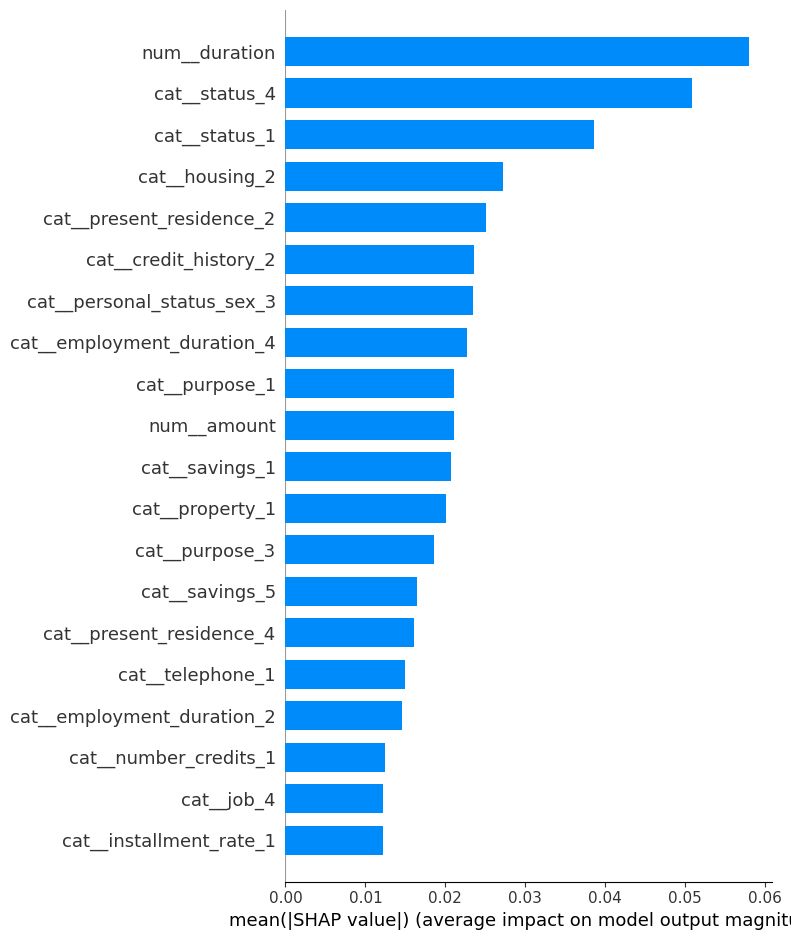

In [ ]:
import tensorflow as tf
import shap

# Se inicializa el SHAP explainer para calcular los valores SHAP
explainer = shap.Explainer(model, X_train.values)

# Se calculan los valores SHAP
shap_values = explainer(X_train.values)

# Visualización de las variables más importantes para el modelo en general
shap.summary_plot(shap_values, features=X_train.values, feature_names=X_train.columns.tolist(), plot_type="bar")

El modelo DNN da mayor importancia a si un cliente está en el rango más alto de "status" (tiene mayor cuenta de cheques) y a la duración del crédito. Da un poco menos importancia a la historia crediticia, al propósito del crédito y la estabilidad en la residencia. Mucho menos importancia le da a la duración del empleo (entre 4 y 7 años) y al número de créditos preexistentes (de 2 a 3).

## Explicabilidad ResNet

PermutationExplainer explainer: 801it [00:45, 13.80it/s]


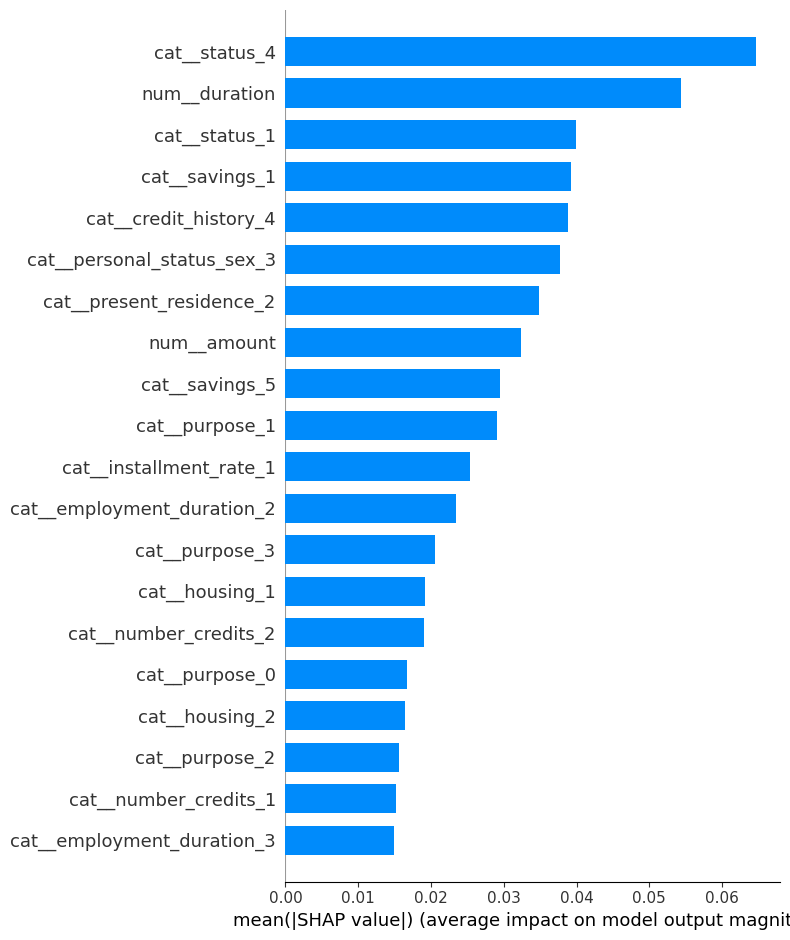

In [ ]:
import shap

# Se inicializa el SHAP explainer para calcular los valores SHAP
explainer = shap.Explainer(resnet_model, X_train.values)

# Se calculan los valores SHAP
shap_values = explainer(X_train.values)

# Visualización de las variables más importantes para el modelo en general
shap.summary_plot(shap_values, features=X_train.values, feature_names=X_train.columns.tolist(), plot_type="bar")

El modelo ResNet da mayor importancia a si un cliente está en el rango más alto de "status" (tiene mayor cuenta de cheques) y a la duración del crédito. Da un poco menos importancia a si cliente no tiene cuenta de ahorros, si es hombre casado o viudo, al historial crediticio y al tiempo en la residencia (de 1 a 4 años). Una importancia media le da a la duración del empleo mayor o igual a 4 años.

## Evaluación Red Neuronal Profunda (DNN)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Informe de Clasificación para el Modelo DNN:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57        60
           1       0.82      0.81      0.81       140

    accuracy                           0.74       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.74      0.74      0.74       200



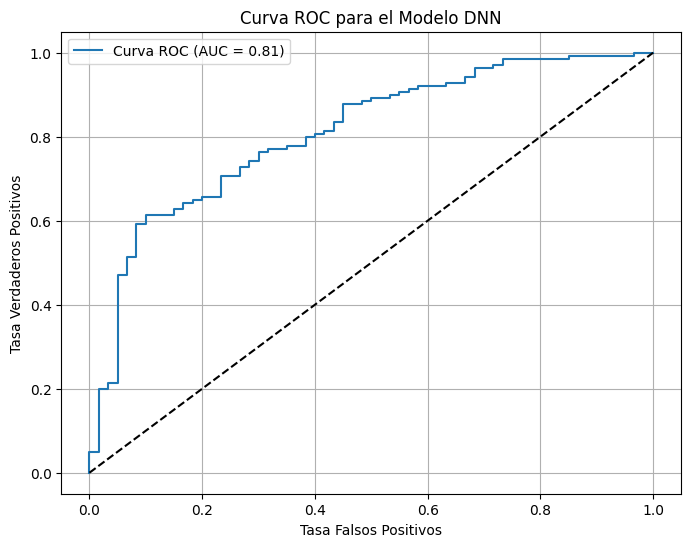


Matriz de Confusión para el Modelo DNN:


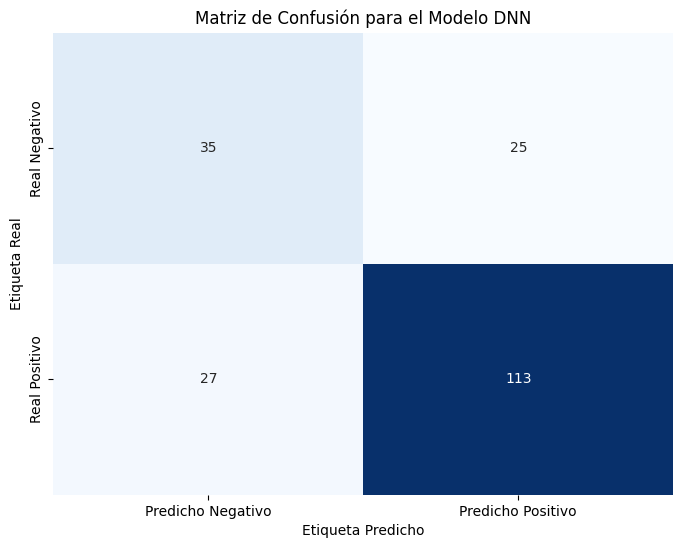

In [ ]:
# Importa librería necesarias
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Se obtienen las predicciones en forma de probabilidades
y_pred_proba = model.predict(X_test).ravel()

# Se convierte a enteros las probabilidades de las predicciones (0 ó 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Informe de clasificación
print("Informe de Clasificación para el Modelo DNN:")
print(classification_report(y_test, y_pred))

# Cálculo de métricas
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_dnn = roc_auc_score(y_test, y_pred_proba)
f1_dnn = f1_score(y_test, y_pred)
recall_dnn = recall_score(y_test, y_pred)

# Gráfico de curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC para el Modelo DNN')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de la matriz de confusión
cm_dnn = confusion_matrix(y_test, y_pred)

# Gráfico de la matriz de confusión
print("\nMatriz de Confusión para el Modelo DNN:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicho Negativo', 'Predicho Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Etiqueta Predicho')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión para el Modelo DNN')
plt.show()

## Evaluación ResNet

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Informe de Clasificación para el Modelo ResNet:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        60
           1       0.83      0.84      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.77      0.77      0.77       200



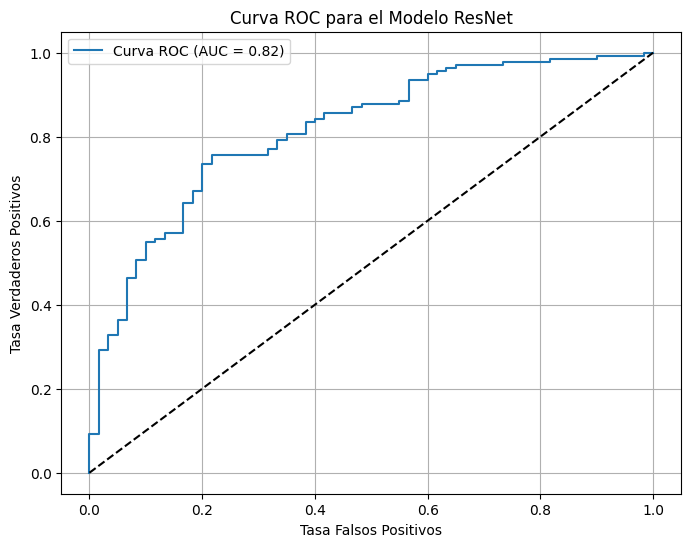


Matriz de Confusión para el Modelo ResNet:


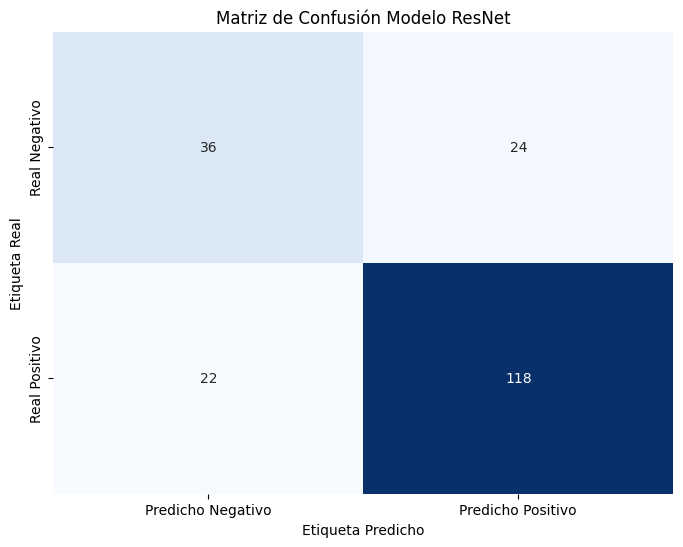

In [ ]:
# Importa librerías necesarias
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Se obtienen las predicciones en forma de probabilidades
y_pred_proba_resnet = resnet_model.predict(X_test).ravel()

# Se convierte a enteros las probabilidades de las predicciones (0 ó 1)
y_pred_resnet = (y_pred_proba_resnet > 0.5).astype(int)

# Informe de clasificación
print("Informe de Clasificación para el Modelo ResNet:")
print(classification_report(y_test, y_pred_resnet))

# Cálculo de métricas
fpr_resnet, tpr_resnet, thresholds_resnet = roc_curve(y_test, y_pred_proba_resnet)
auc_resnet = roc_auc_score(y_test, y_pred_proba_resnet)
f1_resnet = f1_score(y_test, y_pred_resnet)
recall_resnet = recall_score(y_test, y_pred_resnet)

# Gráfico de curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_resnet, tpr_resnet, label=f'Curva ROC (AUC = {auc_resnet:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC para el Modelo ResNet')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de la matriz de confusión
cm_resnet = confusion_matrix(y_test, y_pred_resnet)

# Gráfico de la matriz de confusión
print("\nMatriz de Confusión para el Modelo ResNet:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicho Negativo', 'Predicho Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Etiqueta Predicho')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión Modelo ResNet')
plt.show()

#Comparación de modelos

En la tabla resumen siguiente, se aprecia que aunque el modelo ResNet obtuvo un mayor valor de pérdida, en general obtuvo métricas mejores que el modelo de Red Neuronal Profunda (aunque también se nota que la mejora no es tan grande). De esta forma, resultaría más recomendable implementar el modelo ResNet, dado que al tener mejores métricas, se debe a que tiene una mayor cantidad de verdaderos positivos y mayor cantidad de verdaderos negativos, o sea, predice mejor tanto a las personas que efectivamente podrían pagar su préstamo y a las personas que efectivamente no podrían pagar su préstamo.

In [ ]:
from prettytable import PrettyTable

to_show = PrettyTable(['Modelo', 'Precisión (%)',  'Recall (%)', 'F1 Score (%)', 'AUC (%)', 'Pérdida (%)'])
to_show.add_row([f'Red Neuronal Profunda', f'{test_acc_dnn*100:.3f}', f'{recall_dnn*100:.3f}', f'{f1_dnn*100:.3f}', f'{auc_dnn*100:.3f}', f'{test_loss_dnn*100:.3f}'])
to_show.add_row([f'ResNet', f'{test_acc_resnet*100:.3f}', f'{recall_resnet*100:.3f}', f'{f1_resnet*100:.3f}', f'{auc_resnet*100:.3f}', f'{test_loss_resnet*100:.3f}'])
print(to_show)

+-----------------------+---------------+------------+--------------+---------+-------------+
|         Modelo        | Precisión (%) | Recall (%) | F1 Score (%) | AUC (%) | Pérdida (%) |
+-----------------------+---------------+------------+--------------+---------+-------------+
| Red Neuronal Profunda |     74.000    |   80.714   |    81.295    |  80.988 |    49.001   |
|         ResNet        |     77.000    |   84.286   |    83.688    |  81.631 |    89.376   |
+-----------------------+---------------+------------+--------------+---------+-------------+


#Análisis del impacto de errores tipo I y II en contexto financiero

El error Tipo I se refiere a los falsos positivos, o sea, al predecir un valor positivo (en este caso, predice que alguien cumplirá con su crédito) cuando el valor real es negativo (en realidad no cumplirá). En un contexto financiero sería otorgar crédito a alguien que realmente no cumplirá, por ende, se produce una pérdida financiera para el banco ya que el cliente probablemente caiga en la morosidad, lo cual significa que el banco se arriesga a no recuperar el préstamo aprobado (o quizá solo parcialmente).

El error Tipo II se refiere a los falsos negativos, es decir, al predecir un valor negativo (en este caso, predice que alguien no cumplirá) cuando el resultado real es positivo (sí cumplirá). En un contexto financiero sería negar crédito a alguien que sí lo pagaría, por ende, se produce una pérdida de oportunidades de negocio e incluso se podría perder a estos clientes que buscarían quizá en otro banco que sí les apruebe el crédito.

Como se observa a continuación ResNet tuvo menor cantidad de errores Tipo I y menor cantidad de errores Tipo II, de modo que este modelo es mejor tanto para minimizar la pérdida financiera (que ocurre al aprobar créditos a personas que no lo podrían pagar), así como para minimizar la cantidad de oportunidades de negocio perdidas (que ocurre al negar crédito a clientes que sí lo pagarían).

In [ ]:
to_show = PrettyTable(['Modelo', 'Verdaderos Positivos', 'Falsos Positivos', 'Verdaderos Negativos', 'Falsos Negativos'])
to_show.add_row(['Red Neuronal Profunda', f'{cm_dnn[1][1]}', f'{cm_dnn[0][1]}', f'{cm_dnn[0][0]}', f'{cm_dnn[1][0]}'])
to_show.add_row(['ResNet', f'{cm_resnet[1][1]}', f'{cm_resnet[0][1]}', f'{cm_resnet[0][0]}', f'{cm_resnet[1][0]}'])
print(to_show)

+-----------------------+----------------------+------------------+----------------------+------------------+
|         Modelo        | Verdaderos Positivos | Falsos Positivos | Verdaderos Negativos | Falsos Negativos |
+-----------------------+----------------------+------------------+----------------------+------------------+
| Red Neuronal Profunda |         113          |        25        |          35          |        27        |
|         ResNet        |         118          |        24        |          36          |        22        |
+-----------------------+----------------------+------------------+----------------------+------------------+


## Análisis de Sesgos Potenciales Basado en la Distribución de los Datos

A partir de las visualizaciones de la distribución de las variables (histogramas para numéricas y gráficos de barras para categóricas) y la matriz de correlación, podemos identificar algunos posibles sesgos en el dataset "German Credit Data":

1.  **Desbalanceo de Clases en la Variable Objetivo (`credit_risk`)**: Observamos que la clase mayoritaria (riesgo de crédito 1) es significativamente más frecuente que la clase minoritaria (riesgo de crédito 0). Este desbalanceo puede llevar a que un modelo se incline a predecir la clase mayoritaria con más frecuencia, incluso si no es la predicción correcta para la clase minoritaria. Esto puede resultar en un modelo con alta Precisión general pero bajo Recall para la clase minoritaria (los créditos con riesgo), que es a menudo la clase de interés en la detección de riesgo. Abordar este desbalanceo, por ejemplo, con técnicas como SMOTE o ajustando los pesos de las clases durante el entrenamiento, es crucial para construir un modelo justo y efectivo.

2.  **Posibles Sesgos Demográficos y Socioeconómicos**: Al observar las distribuciones de variables como `age`, `personal_status_sex`, `employment_duration`, `housing`, `job`, y `foreign_worker`, podemos inferir posibles sesgos relacionados con estos atributos.
    *   **Edad (`age`)**: La mayoría de los solicitantes son menores de 40 años. Un modelo entrenado predominantemente con datos de este grupo demográfico podría no generalizar bien a solicitantes de mayor edad, o podría tener un rendimiento sesgado para diferentes grupos de edad.
    *   **Estado Personal y Sexo (`personal_status_sex`)**: La distribución de esta variable muestra que ciertos grupos (como hombres solteros) son más frecuentes en el dataset. Esto podría llevar a que el modelo tenga un rendimiento diferente para grupos subrepresentados.
    *   **Duración del Empleo (`employment_duration`) y Empleo (`job`)**: La concentración de datos en ciertas categorías de empleo y duración del empleo podría introducir sesgos si el modelo sobreajusta a las características de empleo más comunes.
    *   **Trabajador Extranjero (`foreign_worker`)**: La variable `foreign_worker` es predominantemente de una categoría. Un modelo podría no ser equitativo en sus predicciones para trabajadores extranjeros versus no extranjeros debido a la disparidad en los datos.

3.  **Correlaciones y su Potencial de Sesgo**: Aunque la correlación no implica causalidad, una alta correlación entre ciertas variables (especialmente las demográficas o socioeconómicas) y la variable objetivo (`credit_risk`) podría indicar que el modelo podría estar usando estas características de una manera que perpetúa sesgos sociales existentes. Por ejemplo, si hay una fuerte correlación entre `personal_status_sex` o `foreign_worker` y `credit_risk`, el modelo podría estar haciendo predicciones sesgadas basadas en estas características sensibles.

**Implicaciones para la Ética y la Explicabilidad:**

Estos sesgos potenciales son importantes desde una perspectiva ética. Un modelo de riesgo crediticio sesgado podría llevar a decisiones injustas, como negar créditos a ciertos grupos demográficos a pesar de tener una capacidad de pago similar a la de otros grupos favorecidos. La explicabilidad (usando herramientas como SHAP, como se planea en el punto 4) es crucial para entender si el modelo está tomando decisiones basadas en características que podrían ser fuentes de sesgo y para comunicar estas ideas a un equipo de riesgo bancario.

En resumen, el análisis de la distribución de los datos revela un desbalanceo de clases significativo y distribuciones desiguales en varias variables demográficas y socioeconómicas, lo que subraya la necesidad de abordar estos sesgos durante el modelado y evaluar el modelo cuidadosamente desde una perspectiva de equidad.

##Conclusión



Del análisis realizado, se deduce la importancia de considerar múltiples métricas para evaluar un modelo, ya que por ejemplo solo utilizar el *Accuracy* puede ser engañoso para casos como los analizados en este proyecto en que se encontraron clases desbalanceadas para algunas variables, incluyendo la variable objetivo: la categoría de un mal `credit_risk` conforma un 30% del dataset, mientras que un buen `credit_risk` conforma un 70%.

Del análisis de las métricas y las matrices de confusión, se observó que el modelo **ResNet** obtuvo un mejor desempeño en comparación con la **Red Neuronal Profunda (DNN)**, aunque la mejora no es tan significativa ya que tanto las métricas como la cantidad de verdaderos positivos y negativos estuvieron bastante cerca entre sí.

Aunque los modelos neuronales pueden resultar difícil de explicar, existen herramientas como **SHAP** que permite identificar las variables que tienen mayor impacto al momento de realizar predicciones, lo cual puede ser útil para detectar posibles sesgos que pueda estar realizando el modelo, o qué tanto de este sesgo se arrastra desde el dataset. Para esto, el análisis del dataset previo preprocesamiento es esencial para poder detectar si alguna dimensión está sobrerepresentada al revisar la distribución de sus datos.

Además, es necesario considerar qué se quiere priorizar según el problema que se aborde. Para la evaluación de riesgo crediticio, en general se prioriza no dar créditos a quienes no puedan pagarlo, lo cual traería un perjuicio económico para al banco debido a que estos clientes probablemente podrían caer en morosidad y como se analizó previamente, esto correspondería a un error de Tipo I. Pero también conviene considerar los errores de Tipo II, que ocurren cuando se categoriza a un buen cliente como riesgoso, para así buscar minimizar ambos tipos de errores.

